# Trabajo Practico n° 1
### Grupo 27

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

#### Se cargan los datos

In [2]:
train=pd.read_csv('train.csv',encoding='latin-1')

In [3]:
#test=pd.read_csv('test.csv',encoding='utf-8')

In [4]:
sample = pd.read_csv('sample_submission.csv', encoding='latin-1')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
#test.info()

In [7]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3263 non-null   int64
 1   target  3263 non-null   int64
dtypes: int64(2)
memory usage: 51.1 KB


In [8]:
print(train.describe())
#print(test.describe())
print(sample.describe())

                        id               target
count             7,613.00             7,613.00
mean              5,441.93                 0.43
std               3,137.12                 0.50
min                   1.00                 0.00
25%               2,734.00                 0.00
50%               5,408.00                 0.00
75%               8,146.00                 1.00
max              10,873.00                 1.00
                        id               target
count             3,263.00             3,263.00
mean              5,427.15                 0.00
std               3,146.43                 0.00
min                   0.00                 0.00
25%               2,683.00                 0.00
50%               5,500.00                 0.00
75%               8,176.00                 0.00
max              10,875.00                 0.00


Por lo que veo que tanto los textos (tweets) como el target nunca son nill, aunque las keyword y las location si

In [9]:
print(train['keyword'].hasnans)
print(train['location'].hasnans)
print(train['target'].hasnans)
print(train['text'].hasnans)

True
True
False
False


In [10]:
train.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

#### Me fijo la distribución de tweets quese tratan de casos reales de las que no

In [11]:
target_total = train.target.value_counts()
target_total

0    4342
1    3271
Name: target, dtype: int64

Si es 0 (cero) el caso no es real; si es 1 (uno) es real

Text(0, 0.5, 'Cantidad de tweets')

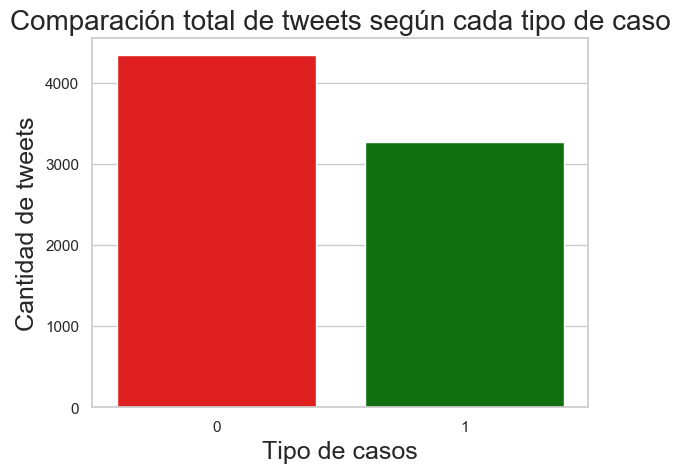

In [12]:
g = sns.barplot(x=target_total.index, y=target_total.values, orient='v', palette=['red','green'])
g.set_title(u"Comparación total de tweets según cada tipo de caso", fontsize=20)
g.set_xlabel(u"Tipo de casos", fontsize=18)
g.set_ylabel(u"Cantidad de tweets", fontsize=18)

Acá podemos ver que del total de tweets que tenemos en el dataframe el 57% de los tweets son de casos no reales y el 43% son de casos reales

### Analizamos los largos de cada tweet

In [13]:
con_len_tweets = train[['id','text','target']].copy()
con_len_tweets['len'] = con_len_tweets['text'].str.len()
con_len_tweets

,id,text,target,len
0,1,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,Forest fire near La Ronge Sask. Canada,1,38
2,5,All residents asked to 'shelter in place' are ...,1,133
3,6,"13,000 people receive #wildfires evacuation or...",1,65
4,7,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,Police investigating after an e-bike collided ...,1,137


Sabemos que cada tweet tiene un maximo de 280 caracteres

In [14]:
con_len_tweets['len'].describe()

count               7,613.00
mean                  101.46
std                    34.06
min                     7.00
25%                    78.00
50%                   107.00
75%                   134.00
max                   163.00
Name: len, dtype: float64

Podemos ver que el promedio de longitud de todos los tweets es aproximadamente de 101 caracteres.

Podemos ver que lso tweets que tienen entre aproximadamente 80 caracteres y 150 son en los que predominan los casos reales, en cambio cuando es menor a 75 caracteres y mayor a 150 caracteres la mayoría de tweets son de casos no reales

Text(0, 0.5, 'Densidad de tweets')

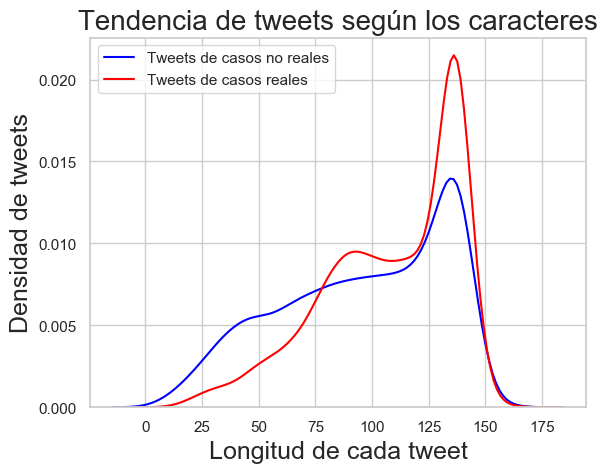

In [15]:
g = sns.distplot(con_len_tweets[con_len_tweets['target'] == 0]['len'], color='blue', label='Tweets de casos no reales', hist=False)
g = sns.distplot(con_len_tweets[con_len_tweets['target'] == 1]['len'], color='red', label='Tweets de casos reales', hist=False)

g.set_title(u"Tendencia de tweets según los caracteres", fontsize=20)
g.set_xlabel(u"Longitud de cada tweet", fontsize=18)
g.set_ylabel(u"Densidad de tweets", fontsize=18)

Analisis de las palabras mas frecuentes en todos los tweets

In [16]:
tweets=train.loc[:,['text']]['text'].transform(lambda palabras: palabras.lower()).value_counts()
tweets

11-year-old boy charged with manslaughter of toddler: report: an 11-year-old boy has been charged with manslaughter over the fatal sh...          10
the prophet (peace be upon him) said 'save yourself from hellfire even if it is by giving half a date in charity.'                                 6
he came to a land which was engulfed in tribal war and turned it into a land of peace i.e. madinah. #prophetmuhammad #islam                        6
#bestnaijamade: 16yr old pkk suicide bomber who detonated bomb in ... http://t.co/ksawlyux02 bestnaijamade bestnaijamade bestnaijamade beâã_     6
madhya pradesh train derailment: village youth saved many lives                                                                                    5
                                                                                                                                                  ..
no civilian population ever deserves demolition may we never forget &amp; learn from our mistakes #hiroshi

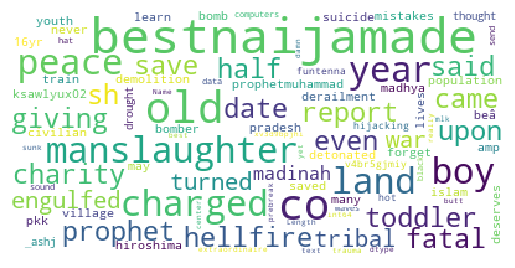

In [17]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(tweets))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Saco la cantidad de palabras usadas por tweet

In [18]:
words = train[['id','text','target']].copy()
words['cant_palabras'] = words['text'].apply(lambda x: len(x.split()))
words

,id,text,target,cant_palabras
0,1,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,Forest fire near La Ronge Sask. Canada,1,7
2,5,All residents asked to 'shelter in place' are ...,1,22
3,6,"13,000 people receive #wildfires evacuation or...",1,8
4,7,Just got sent this photo from Ruby #Alaska as ...,1,16
...,...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1,11
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1,20
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8
7611,10872,Police investigating after an e-bike collided ...,1,19


Text(0.5, 0, 'Palabras por tweets')

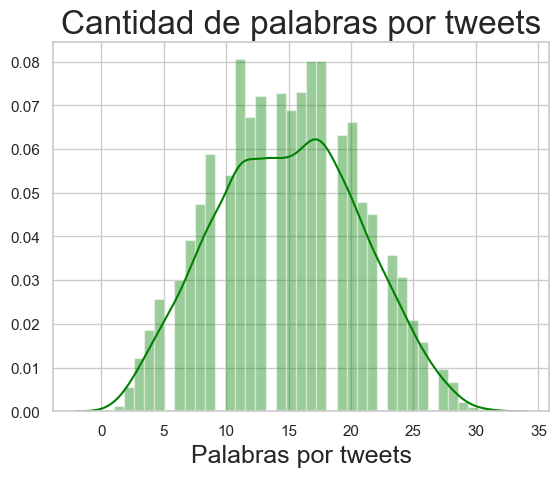

In [19]:
g = sns.distplot(words['cant_palabras'], color="green")
g.set_title("Cantidad de palabras por tweets", fontsize=24)
g.set_xlabel("Palabras por tweets", fontsize=18)

El total de registro de tweets es de 7613. Me fijo la localizaciones de cada tweets

In [20]:
# Saco la localización de cada tweet
localizacion = train['location'].value_counts().sort_values(ascending=False)
#localizacion = localizacion.rename(columns={'location': "total", 'index' : 'location'})
localizacion

USA                         104
New York                     71
United States                50
London                       45
Canada                       29
                           ... 
Eau Claire, Wisconsin         1
Purfleet                      1
Cambridge, Massachusetts      1
cuba                          1
Danville, VA                  1
Name: location, Length: 3341, dtype: int64

Vemos que el total de localizaciones es de 3341 tweets sobre los 7613 totales. Por lo que solo el 43% de los tweets tienen localización.

Text(0, 0.5, 'Localización')

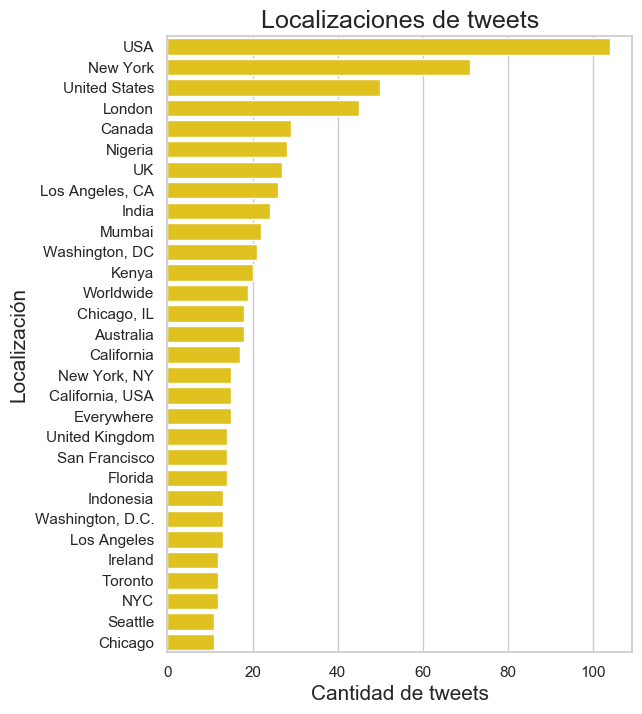

In [21]:
# Vamos a trabajar con las primeras 30 localizaciones
localizacion = localizacion.head(30)
plt.figure(figsize=(6,8))
g = sns.barplot(x=localizacion.values, y=localizacion.index, orient='h', color='gold')
g.set_title(u"Localizaciones de tweets", fontsize=18)
g.set_xlabel(u"Cantidad de tweets", fontsize=15)
g.set_ylabel(u"Localización", fontsize=15)

Separo los tweets con localizaciones dependiendo su target

In [22]:
localization_1 = train[train['target']==1]
localization_0 = train[train['target']==0]

localization_1

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [23]:
localization_0

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7587,10841,NaN,NaN,Sirens everywhere!,0


In [24]:
sum_location_1 = localization_1['location'].value_counts().reset_index()
sum_location_1.rename(columns={"location":"Tweets reales","index":"location"},inplace=True)
sum_location_1

,location,Tweets reales
0,USA,67
1,United States,27
2,Nigeria,22
3,India,20
4,Mumbai,19
...,...,...
1508,USA - Canada - Europe - Asia,1
1509,Why should you know?,1
1510,@potteratthedisc,1
1511,infj,1


In [25]:
sum_location_0 = localization_0['location'].value_counts().reset_index()
sum_location_0.rename(columns={"location":"Tweets no reales","index":"location"},inplace=True)
sum_location_0

,location,Tweets no reales
0,New York,55
1,USA,37
2,London,29
3,United States,23
4,"Los Angeles, CA",18
...,...,...
2137,"Yulee, FL",1
2138,Grand Rapids MI,1
2139,"KADUNA, NIGERIA",1
2140,Nottingham,1


In [26]:
tabla = sum_location_0.set_index('location').join(sum_location_1.set_index('location'))
tabla

,Tweets no reales,Tweets reales
location,,
New York,55,16.00
USA,37,67.00
London,29,16.00
United States,23,27.00
"Los Angeles, CA",18,8.00
...,...,...
"Yulee, FL",1,nan
Grand Rapids MI,1,nan
"KADUNA, NIGERIA",1,nan


Notamos que de las primeras 20 localizaciones donde hay tweets, predomina mucho más los tweets falsos. En las localizaciones que los tweets reales son mayor que los falsos es cuando las localizaciones son paises y no ciudades

Text(0.5, 0, 'Localidades')

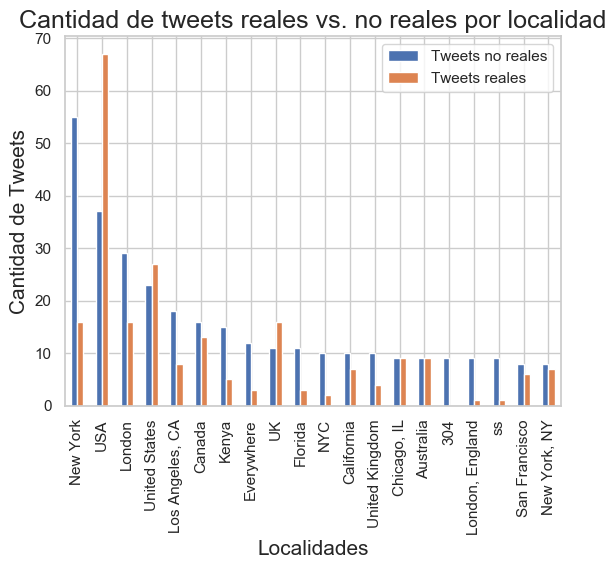

In [27]:
primeros20=tabla.head(20)
g=primeros20.plot.bar()
g.set_title("Cantidad de tweets reales vs. no reales por localidad", fontsize=18)
g.set_ylabel("Cantidad de Tweets", fontsize=15)
g.set_xlabel("Localidades", fontsize=15)

In [28]:
keyword_target=train[['keyword','target']].copy()
keyword_target.dropna(how='any',inplace=True)
keyword_target

,keyword,target
31,ablaze,1
32,ablaze,0
33,ablaze,1
34,ablaze,0
35,ablaze,0
...,...,...
7578,wrecked,0
7579,wrecked,0
7580,wrecked,0
7581,wrecked,0


In [29]:
keyword_target_0 = keyword_target[keyword_target['target'] == 0]
keyword_target_0

,keyword,target
32,ablaze,0
34,ablaze,0
35,ablaze,0
36,ablaze,0
39,ablaze,0
...,...,...
7578,wrecked,0
7579,wrecked,0
7580,wrecked,0
7581,wrecked,0


In [30]:

keyword_sum_0 = keyword_target_0['keyword'].value_counts().sort_values(ascending=False)
keyword_sum_0

body%20bags          40
harm                 37
armageddon           37
wrecked              36
deluge               36
                     ..
oil%20spill           1
typhoon               1
suicide%20bombing     1
outbreak              1
suicide%20bomber      1
Name: keyword, Length: 218, dtype: int64

In [31]:
keyword_target_1 = keyword_target[keyword_target['target'] == 1]
keyword_target_1

,keyword,target
31,ablaze,1
33,ablaze,1
37,ablaze,1
38,ablaze,1
46,ablaze,1
...,...,...
7542,wreckage,1
7543,wreckage,1
7552,wrecked,1
7559,wrecked,1


In [32]:
keyword_sum_1 = keyword_target_1['keyword'].value_counts().sort_values(ascending=False)
keyword_sum_1

derailment     39
wreckage       39
outbreak       39
oil%20spill    37
typhoon        37
               ..
body%20bags     1
ruin            1
body%20bag      1
epicentre       1
electrocute     1
Name: keyword, Length: 220, dtype: int64

Text(0, 0.5, 'Cantidad')

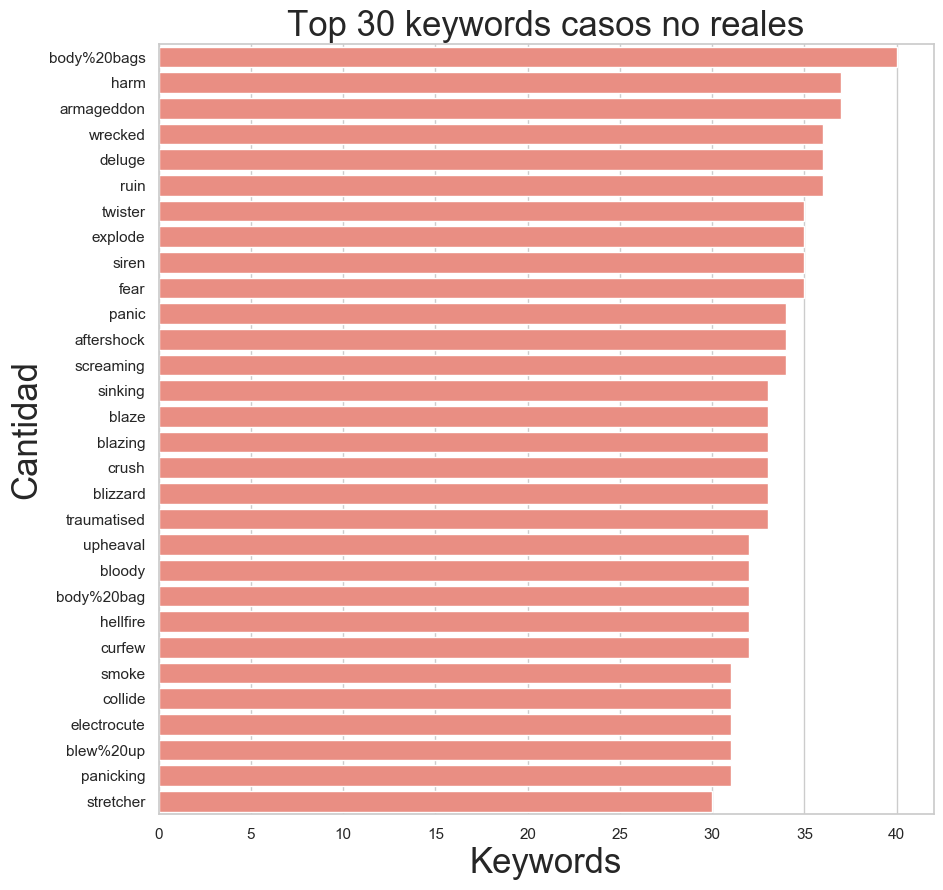

In [100]:
keyword_0_top30 = keyword_sum_0.head(30)
plt.figure(figsize=(10,10))
g = sns.barplot(x=keyword_0_top30.values, y=keyword_0_top30.index, orient="V", color="salmon")

g.set_title("Top 30 keywords casos no reales",fontsize=25)
g.set_xlabel("Keywords", fontsize=25)
g.set_ylabel("Cantidad", fontsize=25)

Text(0, 0.5, 'Cantidad')

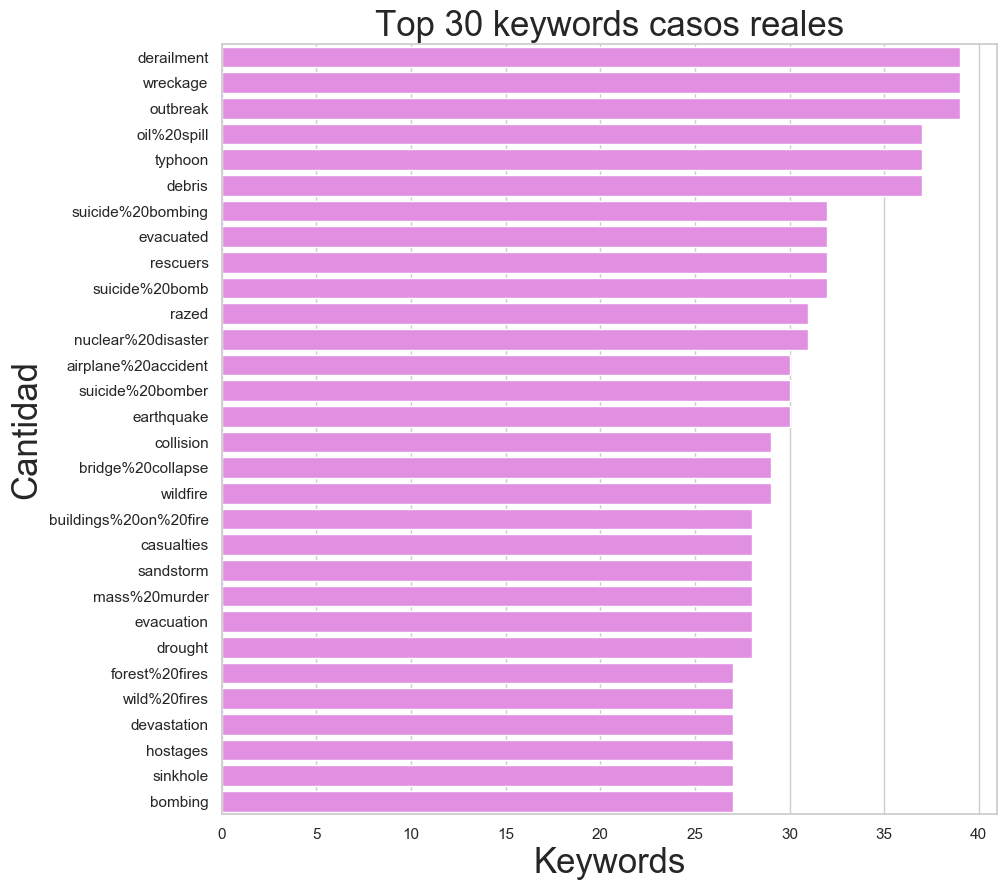

In [101]:
keyword_1_top30 = keyword_sum_1.head(30)
plt.figure(figsize=(10,10))
g = sns.barplot(x=keyword_1_top30.values, y=keyword_1_top30.index, color="violet")
g.set_title("Top 30 keywords casos reales", fontsize=25)
g.set_xlabel("Keywords", fontsize=25)
g.set_ylabel("Cantidad", fontsize=25)

In [35]:
keyword=train[['keyword','target']].copy()

Analizo la cantidad de valores nulos que se tienen en la columna keywords

In [36]:
keyword['keyword'].isna().sum()

61

In [37]:
keyword.dropna(axis=0,inplace=True)

In [38]:
keyword.shape

(7552, 2)

Se eliminaron los keywords nulos, hacemos un análisis de la cantidad de tweets por keyword

In [39]:
keyword['keyword'].value_counts()

fatalities               45
armageddon               42
deluge                   42
damage                   41
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

Como puede verse, hay 221 keywords únicos. Nos interesa saber cuáles son los 30 keywords que poseen la mayor cantidad de tweets

In [40]:
top_30_keywords=keyword['keyword'].value_counts().sort_values(ascending=False).head(30)

Text(0, 0.5, 'Keywords')

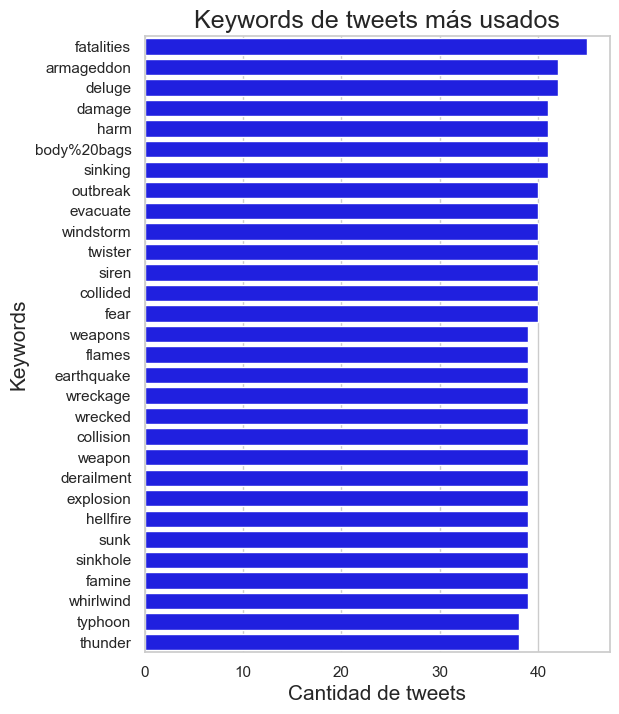

In [41]:
plt.figure(figsize=(6,8))
g = sns.barplot(x=top_30_keywords.values, y=top_30_keywords.index, orient='h', color='blue')
g.set_title(u"Keywords de tweets más usados", fontsize=18)
g.set_xlabel(u"Cantidad de tweets", fontsize=15)
g.set_ylabel(u"Keywords", fontsize=15)

In [42]:
low_30_keywords=keyword['keyword'].value_counts().sort_values(ascending=False).tail(30)

Text(0, 0.5, 'Keywords')

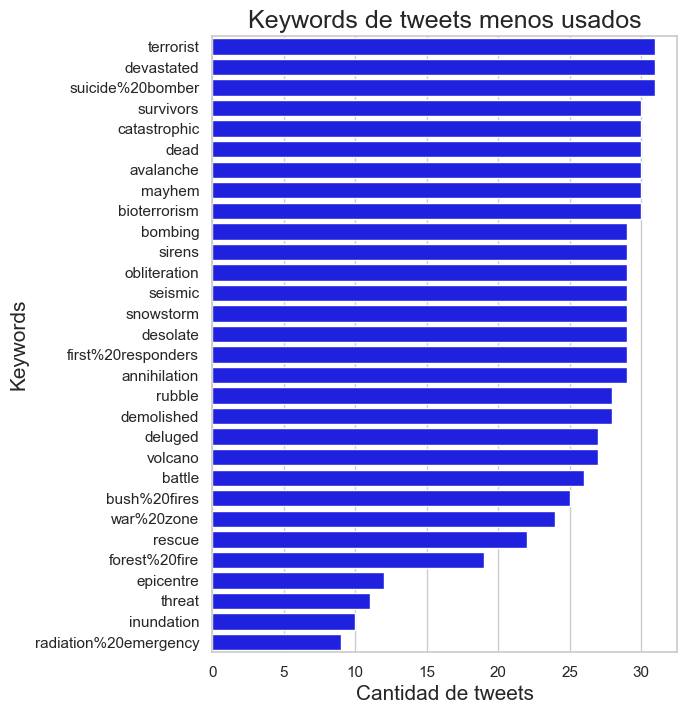

In [43]:
plt.figure(figsize=(6,8))
g = sns.barplot(x=low_30_keywords.values, y=low_30_keywords.index, orient='h', color='blue')
g.set_title(u"Keywords de tweets menos usados", fontsize=18)
g.set_xlabel(u"Cantidad de tweets", fontsize=15)
g.set_ylabel(u"Keywords", fontsize=15)

Ahora que tenemos una idea de la cantidad de tweets por su keyword asociado, analizamos cuántos de esos tweets son verdaderos

In [44]:
keyword=keyword.groupby('keyword').agg('sum').sort_values('target',ascending=False)
keyword.rename(columns={"target":"cantidad de tweets"},inplace=True)

In [45]:
keyword.reset_index(inplace=True)

In [46]:
top_30_key_true=keyword.head(30)
top_30_key_true

,keyword,cantidad de tweets
0,derailment,39
1,wreckage,39
2,outbreak,39
3,typhoon,37
4,debris,37
5,oil%20spill,37
6,suicide%20bomb,32
7,rescuers,32
8,suicide%20bombing,32
9,evacuated,32


Text(0, 0.5, 'Keywords')

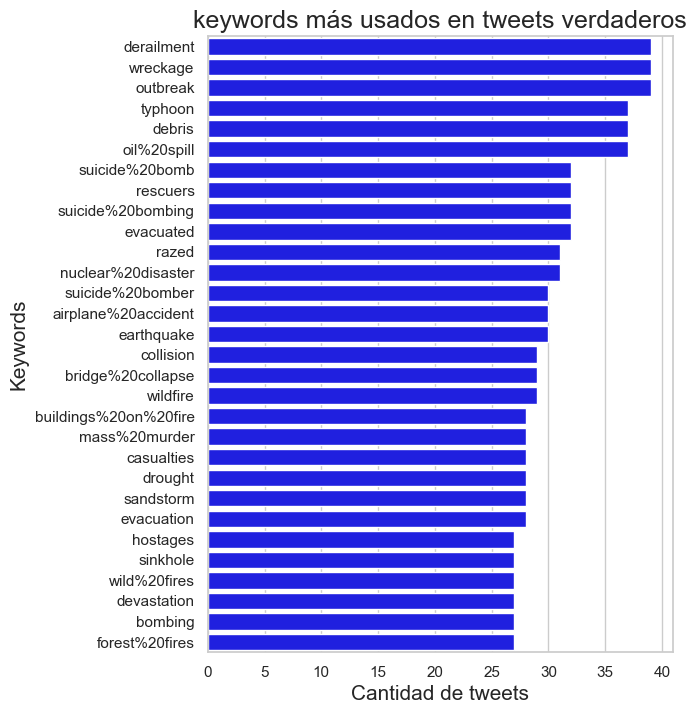

In [47]:
top_30_key_true=keyword.head(30)
plt.figure(figsize=(6,8))
g = sns.barplot(x="cantidad de tweets", y="keyword", data=top_30_key_true, orient='h', color='blue')
g.set_title(u"keywords más usados en tweets verdaderos", fontsize=18)
g.set_xlabel(u"Cantidad de tweets", fontsize=15)
g.set_ylabel(u"Keywords", fontsize=15)

Text(0, 0.5, 'Keywords')

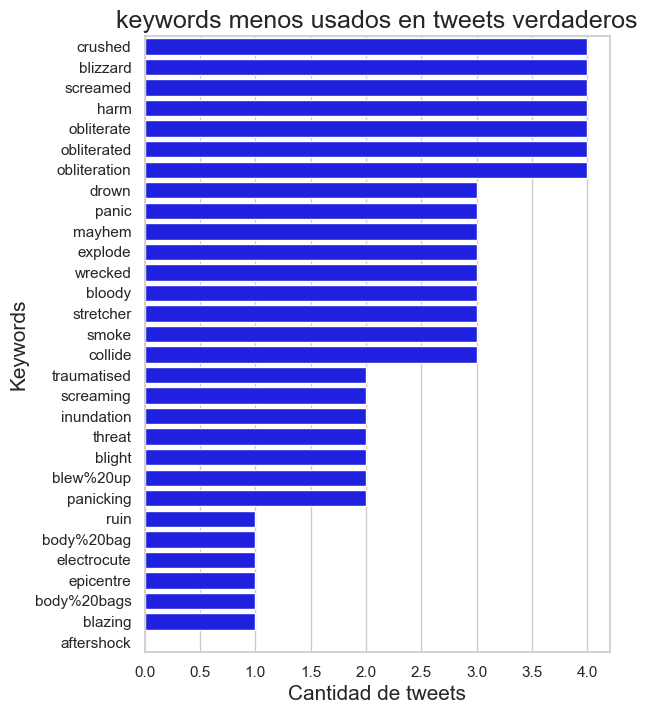

In [48]:
low_30_key_true=keyword.tail(30)
plt.figure(figsize=(6,8))
g = sns.barplot(x="cantidad de tweets", y="keyword", data=low_30_key_true, orient='h', color='blue')
g.set_title(u"keywords menos usados en tweets verdaderos", fontsize=18)
g.set_xlabel(u"Cantidad de tweets", fontsize=15)
g.set_ylabel(u"Keywords", fontsize=15)

In [49]:
keyword_y_location=train[['keyword','location']].copy()
print(keyword_y_location['keyword'].isna().sum())
print(keyword_y_location['location'].isna().sum())

61
2533


In [50]:
#Elimino en donde ambas lineas tiene Nan en la columan keyword, por lo que quedan keyword activas pero sin localización exacta
keyword_y_location.dropna(how='any',inplace=True)
print(keyword_y_location['keyword'].isna().sum())
print(keyword_y_location['location'].isna().sum())

0
0


In [51]:
keyword_y_location['actividad']=1

In [52]:
keyword_y_location['keyword'].value_counts()

collision                36
whirlwind                33
fatalities               32
armageddon               32
emergency%20plan         31
                         ..
threat                   10
epicentre                 9
detonation                8
radiation%20emergency     6
inundation                5
Name: keyword, Length: 221, dtype: int64

In [53]:
#Agrupo por keyword y por localización y sumo el total de repeticiones
keyword_y_location_sum = keyword_y_location.groupby(['keyword','location'],as_index=False)['actividad'].sum()
keyword_y_location_sum

,keyword,location,actividad
0,ablaze,AFRICA,1
1,ablaze,Abuja,1
2,ablaze,Anaheim,1
3,ablaze,Barbados,1
4,ablaze,Birmingham,2
...,...,...,...
4652,wrecked,"Santa Cruz, CA",1
4653,wrecked,TN,1
4654,wrecked,United States,2
4655,wrecked,"Vancouver, Canada",1


Text(47.249999999999986, 0.5, 'Keyword')

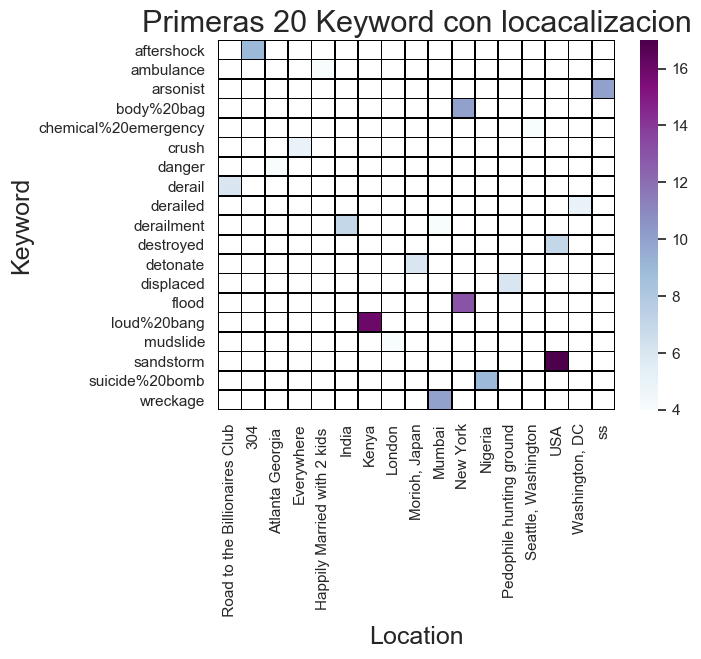

In [54]:
r = keyword_y_location_sum.sort_values(by=['actividad'],ascending=False)
for_heatmap= r.head(20).pivot_table(index='keyword', columns='location', values='actividad', aggfunc='sum')
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu",linecolor='black') # annot=True
g.set_title("Primeras 20 Keyword con locacalizacion", fontsize=22)
g.set_xlabel("Location",fontsize=18)
g.set_ylabel("Keyword", fontsize=18)

Podemos ver que solo en la localización USA hay dos palabras con dentro del top 20 de keywords. También se puede ver que hay localizaciones que no son ciudades o países, y tienen un numero bajo de repeticiones de la misma keyword, por lo que podemos pensar que es la misma persona o gente cercana a esta.

In [55]:
#un analisis del valor de veracidad de cada palabra
#para cada palabra en cada texto, ver cuantos tweets verdaderos tiene asociada
#y en cuantos tweets aparece, como si de una tupla (palabra, (verdaderos,totales))
#de ahi saco una especie de valor de veracidad verdaderos/totales 
#despues puedo eliminar aquellas que no tengan una cierta cantidad de apariciones 
#totales

In [56]:
dicc_palabras={}
def procesar_texto_por_palabra(texto):
    lista_palabras=texto.split()
    for palabra in lista_palabras:
        palabra_lower=palabra.lower()
        cant_apariciones=dicc_palabras.get(palabra_lower,(-1,-1))[1]
        if(cant_apariciones==-1):
            dicc_palabras[palabra_lower]=(0,1)
        else:
            lista_aux=list(dicc_palabras[palabra_lower])
            lista_aux[1]+=1
            tupla=tuple(lista_aux)
            dicc_palabras[palabra_lower]=tupla
            
   

In [57]:
train['text'].apply(procesar_texto_por_palabra)

0       None
1       None
2       None
3       None
4       None
        ... 
7608    None
7609    None
7610    None
7611    None
7612    None
Name: text, Length: 7613, dtype: object

In [58]:
def procesar_texto_por_verdaderos(texto):
    lista_palabras=texto.split()
    for palabra in lista_palabras:
        palabra_lower=palabra.lower()
        cant_apariciones_verdaderas=dicc_palabras.get(palabra_lower,(-1,-1))[0]
        if(cant_apariciones_verdaderas==-1):
            lista_aux=list(dicc_palabras[palabra_lower])
            lista_aux[0]=1
            tupla=tuple(lista_aux)
            dicc_palabras[palabra_lower]=tupla
        else:
            lista_aux=list(dicc_palabras[palabra_lower])
            lista_aux[0]+=1
            tupla=tuple(lista_aux)
            dicc_palabras[palabra_lower]=tupla
            

In [59]:
train[train['target']==1]['text'].apply(procesar_texto_por_verdaderos)

0       None
1       None
2       None
3       None
4       None
        ... 
7608    None
7609    None
7610    None
7611    None
7612    None
Name: text, Length: 3271, dtype: object

In [60]:
lista_llaves=dicc_palabras.keys()

In [61]:
#vemos la cantidad de palabras únicas que hay en el archivo


In [62]:
#nos fijamos la cantidad de palabras únicas que hay en los tweets
len(lista_llaves)

27983

In [63]:
dicc_coeficiente_verdad={}
for llave in lista_llaves:
    ap_verdaderas=dicc_palabras[llave][0]
    ap_totales=dicc_palabras[llave][1]
    coeficiente=float(ap_verdaderas)/float(ap_totales)
    dicc_coeficiente_verdad[llave]=(coeficiente,(ap_verdaderas,ap_totales))

In [64]:
#este ultimo diccionario tiene una forma clave: (valor de verdad ,(apariciones verdaderas, apariciones totales))

In [65]:
lista_coeficiente=[]
lista_apariciones_totales=[]
lista_apariciones_verdaderas=[]
for llave in lista_llaves:
    lista_apariciones_verdaderas.append(dicc_palabras[llave][0])
    lista_apariciones_totales.append(dicc_palabras[llave][1])
    lista_coeficiente.append(dicc_coeficiente_verdad[llave][0])
coeficiente_a_df={}
coeficiente_a_df['palabra']=list(lista_llaves)
coeficiente_a_df['apariciones totales']=lista_apariciones_totales
coeficiente_a_df['apariciones verdaderas']=lista_apariciones_verdaderas
coeficiente_a_df['coeficiente de verdad']=lista_coeficiente

In [66]:
df_coeficiente_de_verdad=pd.DataFrame(coeficiente_a_df).sort_values('coeficiente de verdad',ascending=False)


In [67]:
#quiero información acerca de la cantidad de apariciones de cada palabra de texto
#de manera de eliminar outliers en mi informacion
df_coeficiente_de_verdad['apariciones totales'].describe()

count              27,983.00
mean                    4.05
std                    37.58
min                     1.00
25%                     1.00
50%                     1.00
75%                     2.00
max                 3,207.00
Name: apariciones totales, dtype: float64

In [68]:
#podemos ver entonces que la distribución de los textos es poco uniforme, teniendo la mayor cantidad 
#de los mismos una tasa de aparición de uno o dos elementos. Esto no me sirve para el calculo de coeficiente
#porque es un tamaño de muestra demasiado chico. voy a dropear aquellas palabras que no cumplan con un 
#cierto numero de apariciones

In [69]:
palabras_mas_de_100_apariciones=df_coeficiente_de_verdad[df_coeficiente_de_verdad['apariciones totales']>100]

In [70]:
top30_coef_de_verdad=palabras_mas_de_100_apariciones.head(30)

Text(0, 0.5, 'Palabra')

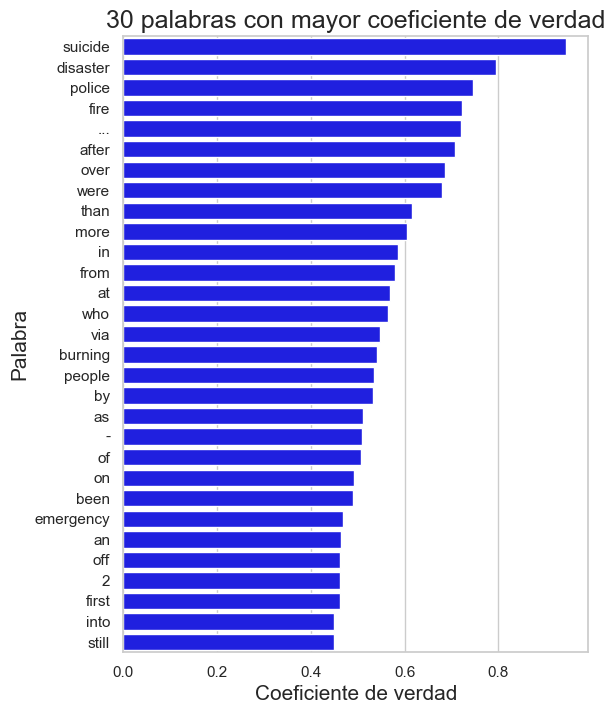

In [71]:
plt.figure(figsize=(6,8))
g = sns.barplot(x="coeficiente de verdad", y="palabra", data=top30_coef_de_verdad, orient='h', color='blue')
g.set_title(u"30 palabras con mayor coeficiente de verdad", fontsize=18)
g.set_xlabel(u"Coeficiente de verdad", fontsize=15)
g.set_ylabel(u"Palabra", fontsize=15)

In [72]:
low30_coef_de_verdad=palabras_mas_de_100_apariciones.tail(30)

Text(0, 0.5, 'Palabra')

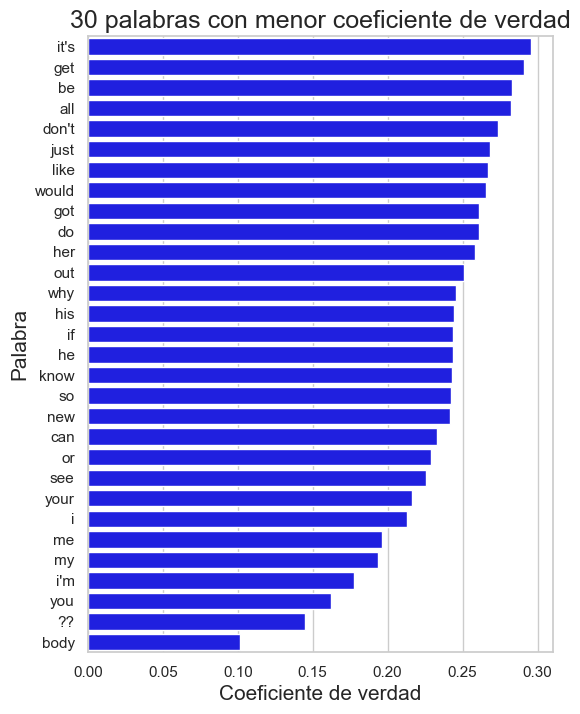

In [73]:
plt.figure(figsize=(6,8))
g = sns.barplot(x="coeficiente de verdad", y="palabra", data=low30_coef_de_verdad, orient='h', color='blue')
g.set_title(u"30 palabras con menor coeficiente de verdad", fontsize=18)
g.set_xlabel(u"Coeficiente de verdad", fontsize=15)
g.set_ylabel(u"Palabra", fontsize=15)

Como puede verse, entre las palabras que mayor coeficiente tienen se encuentran numerosos articulos, pronombres
y preposiciones, lo cual tiene sentido, dado que son una parte fundamental del lenguaje. Por ser palabras
tan comunes, tienen una alta tasa de aparición por lo que no aporta información relevante para el análisis
de si un tweet es verdadero o no. Se decide entonces quitar estas palabras que son comunes, y analizar las 
que quedan.

In [74]:
cien_palabras_mas_comunes_idioma_ingles=["the","of","and","a","to","in","is","you","that","it",\
                                         "he","was","for","on","are","as","with","his","they","i",\
                                         "at","be","this","have","from","or","one","had","by","word",\
                                         "but","not","what","all","were","we","when","your","can",\
                                         "said","there","use","an","each","which","she","do","how",\
                                         "their","if","will","up","other","out","many","then","them",\
                                         "these","so","some","her","would","make","like","him","into",\
                                         "time","has","look","two","more","write","go","see","number",\
                                         "no","way","could","people","my","than","first","water","beem",\
                                         "call","who","oil","its","now","find","long","down","day","did",\
                                         "get","come","may","part"]

In [75]:
df_coeficiente_de_verdad['palabra comun']=df_coeficiente_de_verdad['palabra'].apply(lambda x:True if x in cien_palabras_mas_comunes_idioma_ingles else False)

In [76]:
df_coeficiente_de_verdad['palabra comun'].value_counts()

False    27886
True        97
Name: palabra comun, dtype: int64

Como puede verse, 97 de las 100 palabras más comunes aparecen en los tweets analizados.

In [78]:
df_coeficiente_de_verdad_sin_palabras_comunes=df_coeficiente_de_verdad[df_coeficiente_de_verdad['palabra comun']==False].copy()

In [79]:
df_coeficiente_de_verdad_sin_palabras_comunes.drop(labels='palabra comun',axis=1,inplace=True)

In [80]:
#ahora que se filtraron los datos, se vuelve a hacer el análisis 
#decido dropear aquellos elementos que tengan menos de 100 apariciones

In [81]:
df_coeficiente_apariciones_mas_de_100=df_coeficiente_de_verdad_sin_palabras_comunes[df_coeficiente_de_verdad_sin_palabras_comunes['apariciones totales']>100].copy()

In [82]:
df_coeficiente_apariciones_mas_de_100.shape

(31, 4)

In [83]:
#habiendo eliminado aquellas palabras que no tuvieran mas de 100 apariciones, nos queda un panorama distinto
#tenemos solo 31 elementos que cumplen con lo pedido, veamos cuales son

In [84]:
df_coeficiente_apariciones_mas_de_100.sort_values('coeficiente de verdad',ascending=False,inplace=True)

In [85]:
df_coeficiente_apariciones_mas_de_100.head(31)

,palabra,apariciones totales,apariciones verdaderas,coeficiente de verdad
2602,suicide,109,103,0.94
5980,disaster,122,97,0.80
244,police,126,94,0.75
14,fire,209,151,0.72
345,...,147,106,0.72
1670,after,256,181,0.71
589,over,179,123,0.69
1012,via,214,117,0.55
2472,burning,111,60,0.54
67,-,763,389,0.51


In [86]:
top_16_coeficiente_de_verdad=df_coeficiente_apariciones_mas_de_100.head(16)

Text(0, 0.5, 'Palabra')

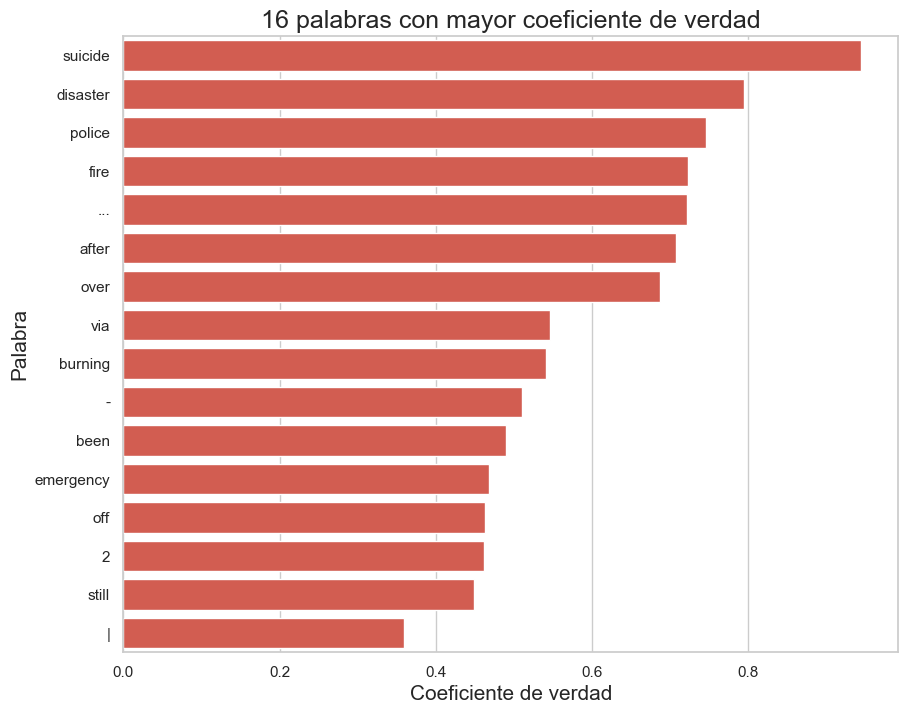

In [87]:
plt.figure(figsize=(10,8))
g = sns.barplot(x="coeficiente de verdad", y="palabra", data=top_16_coeficiente_de_verdad, orient='h', color="#e74c3c")
g.set_title(u"16 palabras con mayor coeficiente de verdad", fontsize=18)
g.set_xlabel(u"Coeficiente de verdad", fontsize=15)
g.set_ylabel(u"Palabra", fontsize=15)

In [88]:
low_15_coeficiente_de_verdad=df_coeficiente_apariciones_mas_de_100.tail(15)

Text(0, 0.5, 'Palabra')

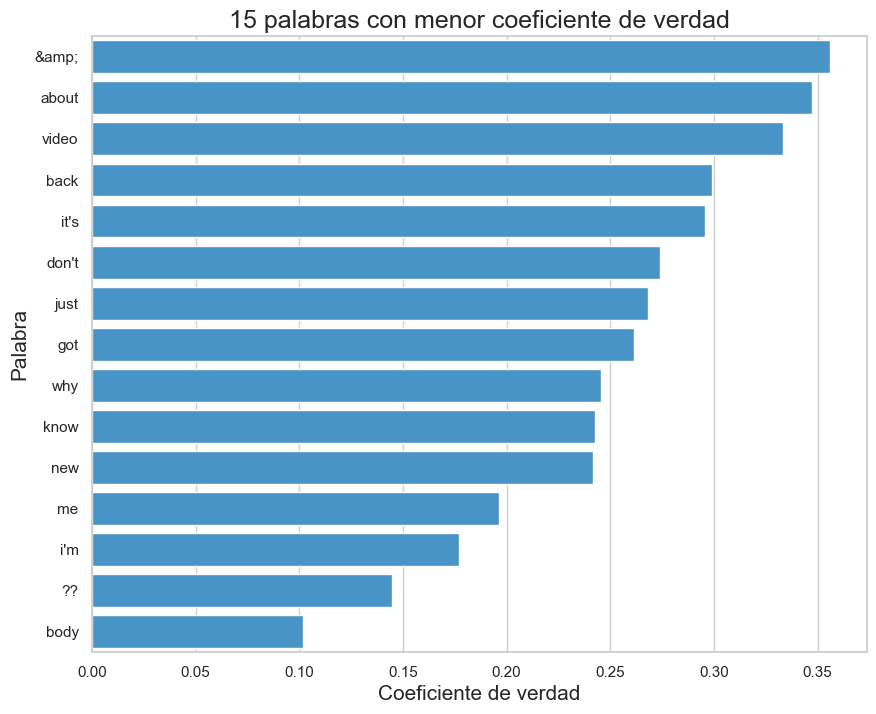

In [89]:
plt.figure(figsize=(10,8))
g = sns.barplot(x="coeficiente de verdad", y="palabra", data=low_15_coeficiente_de_verdad, orient='h', color= "#3498db")
g.set_title(u"15 palabras con menor coeficiente de verdad", fontsize=18)
g.set_xlabel(u"Coeficiente de verdad", fontsize=15)
g.set_ylabel(u"Palabra", fontsize=15)

# Analisis de hashtags


Text(0, 0.5, 'Cantidad de tweets con hashtags')

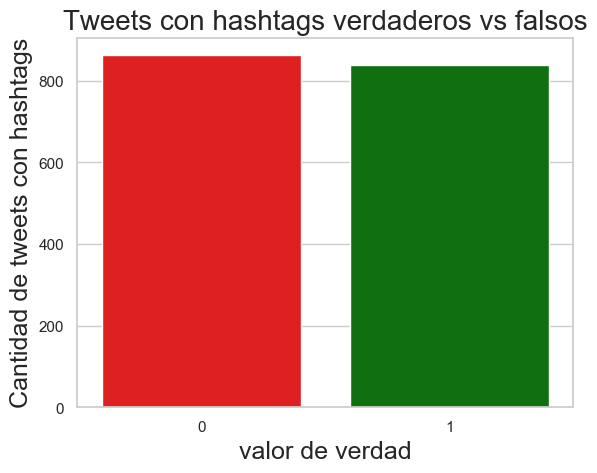

In [90]:
def extraerHashtags(text):
    text = text.split(" ")
    hashtags = []
    for word in text:
        word.replace(" ","")
        if word.startswith("#") and not word.startswith("##") and word != "#":
            hashtags.append(word)
    return hashtags
ver_hashtags = train[["id","text", "target"]].copy()
ver_hashtags["hashtags"] = ver_hashtags["text"].apply(extraerHashtags)
ver_hashtags["cantidad_hashtags"] = ver_hashtags["hashtags"].apply(lambda x: len(x))
ver_hashtags
tienen_hashtags = ver_hashtags[ver_hashtags["cantidad_hashtags"] > 0]
cantidades = tienen_hashtags.target.value_counts()




g = sns.barplot(x=cantidades.index, y = cantidades.values, orient='v', palette=['red','green'])
g.set_title(u"Tweets con hashtags verdaderos vs falsos", fontsize=20)
g.set_xlabel(u"valor de verdad", fontsize=18)
g.set_ylabel(u"Cantidad de tweets con hashtags", fontsize=18)

al menos por ahora no parece haber una relacion entre el valor de verdad y el uso de hashtags. veremos ahora el valor de verdad promedio para cada cantidad de hashtags usados por tweet

Text(0.5, 0, 'Tweets')

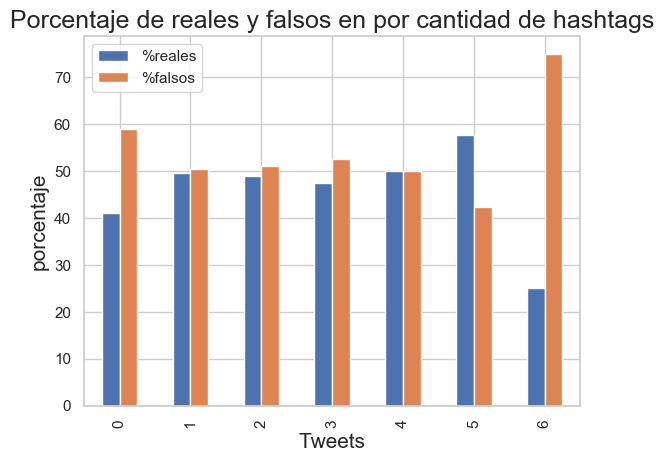

In [91]:
comparacion = ver_hashtags["cantidad_hashtags"].value_counts().reset_index()
comparacion["cantidad_reales"] = ver_hashtags[ver_hashtags["target"] == 1].cantidad_hashtags.value_counts()
comparacion["cantidad_falsos"] = ver_hashtags[ver_hashtags["target"] == 0].cantidad_hashtags.value_counts()

comparacion["%reales"] = comparacion.apply(lambda x: x["cantidad_reales"]/x["cantidad_hashtags"] * 100, axis = 1)
comparacion["%falsos"] = comparacion.apply(lambda x: x["cantidad_falsos"]/x["cantidad_hashtags"] * 100, axis = 1)

#Tomo los primeros 7 valores porque luego la cantidad de muestras disminuye y el porcentaje deja de ser representativo.    
    
prcentajes_utiles=comparacion[["%reales", "%falsos"]].head(7)
g=prcentajes_utiles.plot.bar()
g.set_title("Porcentaje de reales y falsos en por cantidad de hashtags", fontsize=18)
g.set_ylabel("porcentaje", fontsize=15)
g.set_xlabel("Tweets", fontsize=15)


observamos que la cantidad de hashtags no parece tener relevancia a la hora de predecir la veracidad de un tweet ya que en casi todos los
casos se observa que los porcentajes se acercan al 50%

In [92]:
hashtags = tienen_hashtags[["target", "hashtags"]]
hashtags = tienen_hashtags.explode("hashtags").hashtags.value_counts().reset_index().set_index("index")
hashtags["porcentaje_verdad"] = tienen_hashtags.explode("hashtags").groupby("hashtags").target.mean().reset_index().set_index("hashtags")
hashtags["porcentaje_verdad"] = hashtags.porcentaje_verdad.apply(lambda x: x*100)
hashtags.head(30)


,hashtags,porcentaje_verdad
index,,
#news,36,58.33
#hot,30,43.33
#best,30,43.33
#prebreak,30,43.33
#News,29,93.10
#???,23,100.00
#Hiroshima,20,100.00
#??,19,94.74
#GBBO,16,25.00


Text(0, 0.5, 'Palabra')

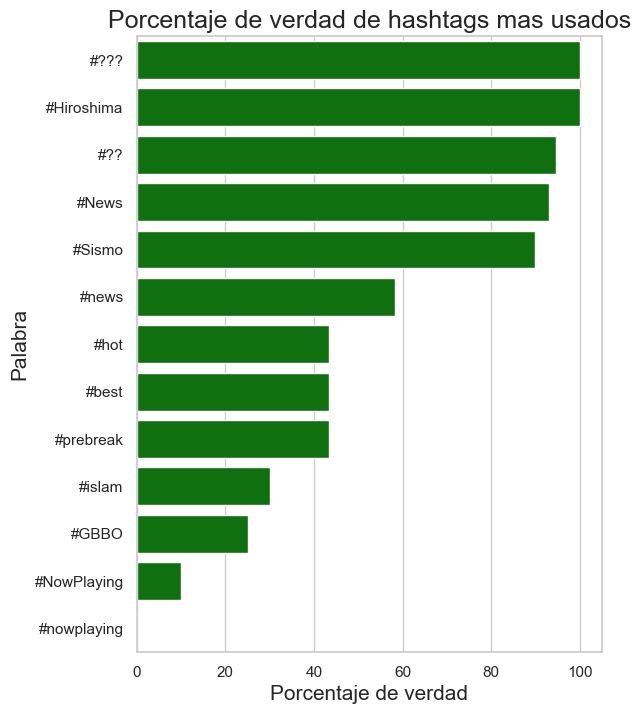

In [93]:
#tomare hashtags con al menos 10 casos para visualizar los resultados, para esto usare un grafico similar al de coeficiente de 
#verdad de las palabras usaado antes

hashtags = hashtags[hashtags["hashtags"] > 9]
hashtags.sort_values(by=['porcentaje_verdad'], inplace = True, ascending = False)
plt.figure(figsize=(6,8))
g = sns.barplot(x=hashtags.porcentaje_verdad, y=hashtags.index, orient='h', color='green')
g.set_title(u"Porcentaje de verdad de hashtags mas usados", fontsize=18)
g.set_xlabel(u"Porcentaje de verdad", fontsize=15)
g.set_ylabel(u"Palabra", fontsize=15)
